# Module 2: Text into Data: Importing a Text

* DS 5001: Exploratory Text Analytics
* Raf Alvarado

# Set Up

In [253]:
epub_file = "../MOD01--SetUp/pg105.txt"

In [254]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

In [255]:
import pandas as pd
%matplotlib inline

# Import file into a dataframe

In [256]:
epub = open(epub_file, 'r', encoding='utf-8-sig').readlines()
df = pd.DataFrame(epub, columns=['line_str'])
df.index.name = 'line_num'
df.line_str = df.line_str.str.strip()

In [257]:
df.sample(10)

,line_str
line_num,
1560,the same brother must still be in question. S...
1644,"appear that he was expected, and speedily, but..."
1248,"""Oh! but they ought to call upon you as soon a..."
6711,"meditating over, and say--"
5070,Mrs Wallis of Marlborough Buildings; a mere pr...
8217,"an Anne Elliot, with the advantage of maturity..."
2217,refinement!--Women may be as comfortable on bo...
4732,"supporting the superficial, that she was at fi..."
8017,"though till that day, till the leisure for ref..."


# Extract title of work from first line

In [258]:
title = df.loc[0].line_str.replace('The Project Gutenberg EBook of ', '')
df['title'] = title

In [259]:
print(title)

Persuasion, by Jane Austen


In [260]:
df.head()

,line_str,title
line_num,,
0,"The Project Gutenberg EBook of Persuasion, by ...","Persuasion, by Jane Austen"
1,,"Persuasion, by Jane Austen"
2,This eBook is for the use of anyone anywhere a...,"Persuasion, by Jane Austen"
3,almost no restrictions whatsoever. You may co...,"Persuasion, by Jane Austen"
4,re-use it under the terms of the Project Guten...,"Persuasion, by Jane Austen"


# Remove Gutenberg's front and back matter

In [261]:
a = df.line_str.str.match(r"\*\*\*\s*START OF (THE|THIS) PROJECT")
b = df.line_str.str.match(r"\*\*\*\s*END OF (THE|THIS) PROJECT")

In [262]:
an = df.loc[a].index[0]
bn = df.loc[b].index[0]

In [263]:
df = df.loc[an + 1 : bn - 2]

In [264]:
df

,line_str,title
line_num,,
19,,"Persuasion, by Jane Austen"
20,,"Persuasion, by Jane Austen"
21,,"Persuasion, by Jane Austen"
22,,"Persuasion, by Jane Austen"
23,Produced by Sharon Partridge and Martin Ward. ...,"Persuasion, by Jane Austen"
24,by Al Haines.,"Persuasion, by Jane Austen"
25,,"Persuasion, by Jane Austen"
26,,"Persuasion, by Jane Austen"
27,,"Persuasion, by Jane Austen"


# Chunk by chapter

## Find all chapter headers

In [265]:
chap_lines = df.line_str.str.match(r"^\s*(chapter|letter)\s+(\d+)", case=False)

In [266]:
df.loc[chap_lines]

,line_str,title
line_num,,
47,Chapter 1,"Persuasion, by Jane Austen"
306,Chapter 2,"Persuasion, by Jane Austen"
500,Chapter 3,"Persuasion, by Jane Austen"
786,Chapter 4,"Persuasion, by Jane Austen"
959,Chapter 5,"Persuasion, by Jane Austen"
1297,Chapter 6,"Persuasion, by Jane Austen"
1657,Chapter 7,"Persuasion, by Jane Austen"
1992,Chapter 8,"Persuasion, by Jane Austen"
2346,Chapter 9,"Persuasion, by Jane Austen"


## Assign numbers to chapters

In [267]:
chap_nums = [i+1 for i in range(df.loc[chap_lines].shape[0])]

In [268]:
df.loc[chap_lines, 'chap_num'] = chap_nums

## Forward-fill chapter numbers to following text lines

In [269]:
df.chap_num = df.chap_num.ffill()

## Clean up

In [270]:
df = df.loc[~df.chap_num.isna()] # Remove chapter heading lines
df = df.loc[~chap_lines] # Remove everything before Chapter 1
df.chap_num = df.chap_num.astype('int') # Convert chap_num from float to int

In [271]:
df.sample(10)

,line_str,title,chap_num
line_num,,,
7325,,"Persuasion, by Jane Austen",22
6216,seemed prosperity in the shape of an early abd...,"Persuasion, by Jane Austen",20
6356,Anne heard nothing of this. She was still in ...,"Persuasion, by Jane Austen",21
8047,precisely as he became fully satisfied of his ...,"Persuasion, by Jane Austen",23
4823,heard her spoken of as a charming woman. It w...,"Persuasion, by Jane Austen",16
1489,"fingers of yours fly about!""","Persuasion, by Jane Austen",6
5659,already on his way thither. Before Mrs Croft ...,"Persuasion, by Jane Austen",19
7990,"everything he had said and done, or omitted to...","Persuasion, by Jane Austen",23
6897,,"Persuasion, by Jane Austen",21


## Group by chapter num and reset dataframe 

In [272]:
dfc = df.groupby(OHCO[:1]).line_str.apply(lambda x: '\n'.join(x)).to_frame() # Make big string

In [273]:
dfc.head()

,line_str
chap_num,
1,"\n\nSir Walter Elliot, of Kellynch Hall, in So..."
2,"\n\nMr Shepherd, a civil, cautious lawyer, who..."
3,"\n\n""I must take leave to observe, Sir Walter,..."
4,"\n\nHe was not Mr Wentworth, the former curate..."
5,\n\nOn the morning appointed for Admiral and M...


# Split into paragraphs 

In [274]:
dfp = dfc['line_str'].str.split(r'\n\n+', expand=True).stack()\
    .to_frame().rename(columns={0:'para_str'})

In [275]:
dfp.head()

para_str
chap_num                                                     
1        0                                                   
         1  Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                          "ELLIOT OF KELLYNCH HALL.
         3  "Walter Elliot, born March 1, 1760, married, J...
         4  Precisely such had the paragraph originally st...

In [276]:
dfp.index.names = OHCO[:2]

In [277]:
dfp.head()

para_str
chap_num para_num                                                   
1        0                                                          
         1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 "ELLIOT OF KELLYNCH HALL.
         3         "Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...

In [278]:
dfp['para_str'] = dfp['para_str'].str.replace(r'\n', ' ').str.strip()
dfp = dfp[~dfp['para_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [279]:
dfp.head()

para_str
chap_num para_num                                                   
1        1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 "ELLIOT OF KELLYNCH HALL.
         3         "Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...
         5         Then followed the history and rise of the anci...

# Split into sentences

ADDED " to regex

In [280]:
dfs = dfp['para_str'].str.split(r'[.?!;"]+', expand=True).stack()\
    .to_frame().rename(columns={0:'sent_str'})

In [281]:
dfs.index.names = OHCO[:3]

In [282]:
dfs = dfs[~dfs['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [283]:
dfs.head()

sent_str
chap_num para_num sent_num                                                   
1        1        0         Sir Walter Elliot, of Kellynch Hall, in Somers...
                  1          there he found occupation for an idle hour, a...
                  2          there his faculties were roused into admirati...
                  3          there any unwelcome sensations, arising from ...
                  4          and there, if every other leaf were powerless...

# Split into tokens

In [284]:
dft = dfs['sent_str'].str.split(r"[\s'-]+", expand=True).stack()\
    .to_frame().rename(columns={0:'token_str'})

In [285]:
dft.index.names = OHCO[:4]

In [286]:
dft.head()

token_str
chap_num para_num sent_num token_num          
1        1        0        0               Sir
                           1            Walter
                           2           Elliot,
                           3                of
                           4          Kellynch

# Gathering by Content Object

In [287]:
sents = dft.groupby(OHCO[:3]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
paras = dft.groupby(OHCO[:2]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
chaps = dft.groupby(OHCO[:1]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})

In [288]:
def gather(ohco_level):
    return df.groupby(OHCO[:ohco_level]).token_str\
        .apply(lambda x: ' '.join(x))\
        .to_frame()\
        .rename(columns={'token_str':'content'})

In [289]:
sents.sample(10)

,,,content
chap_num,para_num,sent_num,
9,8,1,"Henrietta was perhaps the prettiest, Louisa h..."
12,17,15,Oh
23,42,1,I can listen no longer in silence
12,67,1,"and, united as they all seemed by the distres..."
22,63,14,"The card was pointedly given, and Sir Walter ..."
8,13,7,Lucky fellow to get her
3,27,2,I remember no gentleman resident at Monkford ...
7,10,12,"and yet, I am sure, I am more unfit than anyb..."
2,3,1,that did not admit of a doubt


In [290]:
# sents2 = sents.reset_index(drop=True)

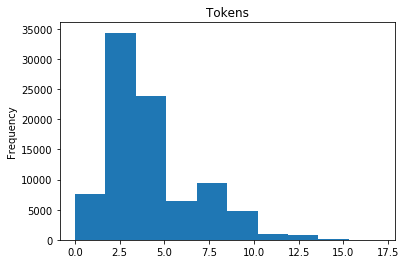

In [291]:
dft.token_str.str.len().plot.hist(bins=10, title="Tokens")

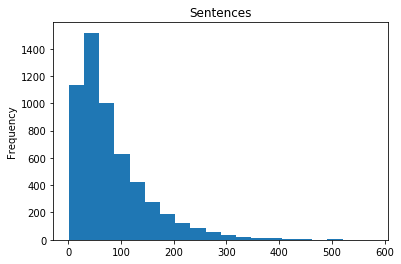

In [292]:
sents.content.str.len().plot.hist(bins=20, title='Sentences')

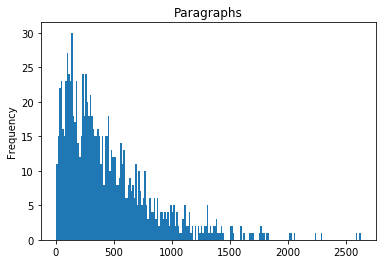

In [293]:
paras.content.str.len().plot.hist(bins=200, title="Paragraphs")

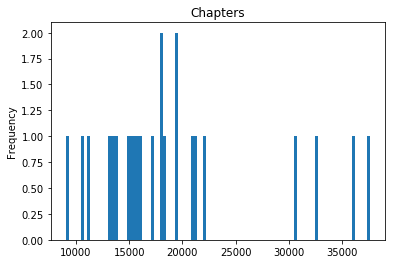

In [294]:
chaps.content.str.len().plot.hist(bins=100, title="Chapters")

# Save work to CSV

In [295]:
dft.to_csv('austen-persuasion.csv')